In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imshow, imread

img = cv2.imread(r'C:\Users\Pranav\OneDrive\Desktop\FDIP\Assignment2\scenery.jpg', cv2.IMREAD_GRAYSCALE)

def show(img, title):
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

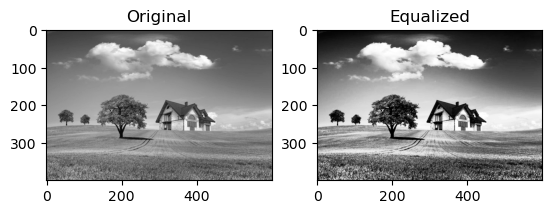

In [23]:
equalized = cv2.equalizeHist(img)

plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title('Original')
plt.subplot(122), plt.imshow(equalized, cmap='gray'), plt.title('Equalized')
plt.show()

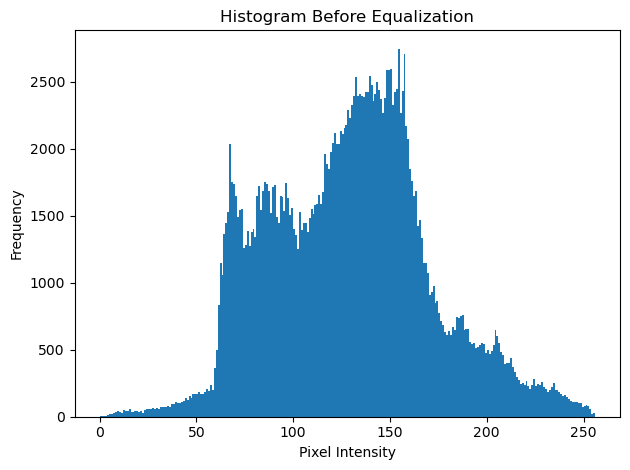

Comment: The original histogram shows the intensity distribution of the image. If it's narrow, contrast is low.


In [53]:

plt.hist(img.ravel(), 256, [0, 256])
plt.title('Histogram Before Equalization')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
print("Comment: The original histogram shows the intensity distribution of the image. If it's narrow, contrast is low.")

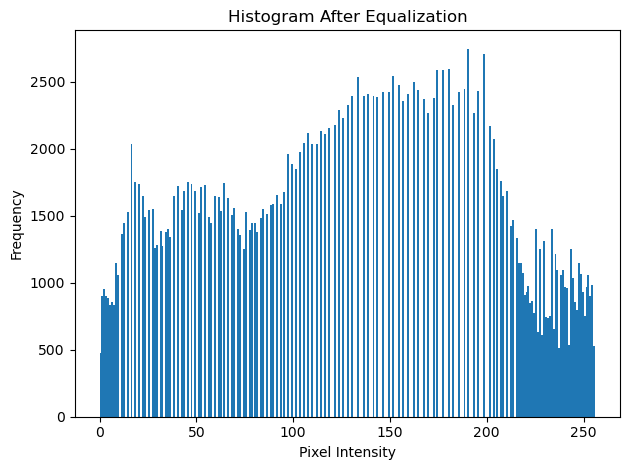

Comment: Histogram equalization spreads out pixel intensities, improving overall contrast.


In [27]:
plt.hist(equalized.ravel(), 256, [0, 256])
plt.title('Histogram After Equalization')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
print("Comment: Histogram equalization spreads out pixel intensities, improving overall contrast.")

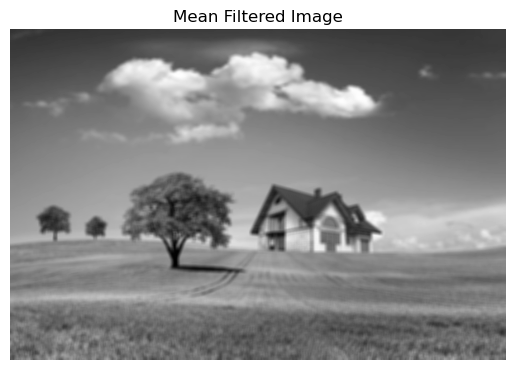

Comment: Mean filter smooths the image but blurs edges along with noise.


In [29]:
mean_filtered = cv2.blur(img, (5, 5))
plt.imshow(mean_filtered, cmap='gray')
plt.title("Mean Filtered Image")
plt.axis('off')
plt.show()
print("Comment: Mean filter smooths the image but blurs edges along with noise.")

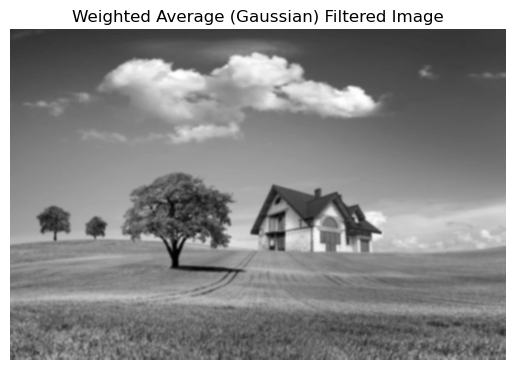

Comment: Gaussian filter smooths the image while preserving edges better than a simple mean filter.


In [31]:
weighted_filtered = cv2.GaussianBlur(img, (5, 5), 0)
plt.imshow(weighted_filtered, cmap='gray')
plt.title("Weighted Average (Gaussian) Filtered Image")
plt.axis('off')
plt.show()
print("Comment: Gaussian filter smooths the image while preserving edges better than a simple mean filter.")

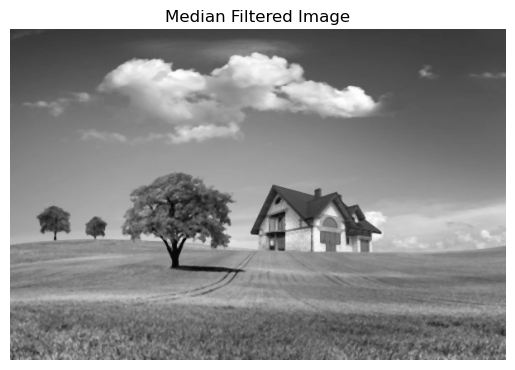

Comment: Median filter effectively removes salt-and-pepper noise while preserving edges.


In [33]:
median_filtered = cv2.medianBlur(img, 3)
plt.imshow(median_filtered, cmap='gray')
plt.title("Median Filtered Image")
plt.axis('off')
plt.show()
print("Comment: Median filter effectively removes salt-and-pepper noise while preserving edges.")

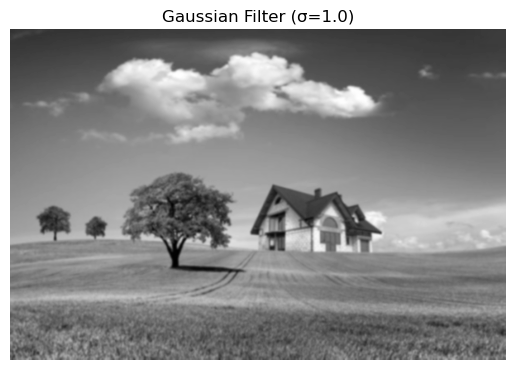

Gaussian filter reduces high-frequency noise; increasing σ increases blurring.


In [35]:
gaussian_filtered = cv2.GaussianBlur(img, (5,5), 1.0)
plt.imshow(gaussian_filtered, cmap='gray')
plt.title("Gaussian Filter (σ=1.0)")
plt.axis('off')
plt.show()
print("Gaussian filter reduces high-frequency noise; increasing σ increases blurring.")


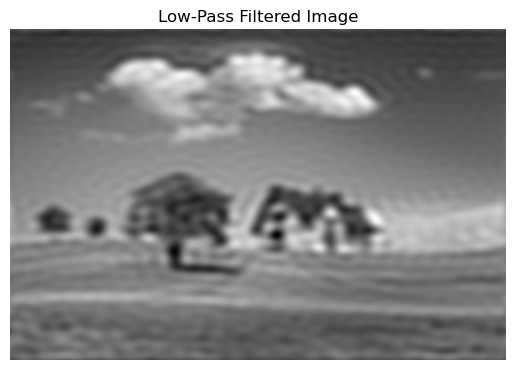

Comment: Low-pass filter smooths the image by removing high-frequency (edge/texture) details.


In [45]:
# Fourier Transform
F = np.fft.fftshift(np.fft.fft2(img))
rows, cols = img.shape
crow, ccol = rows//2, cols//2

# Create circular low-pass mask
mask = np.zeros((rows, cols), np.uint8)
r = 30
y, x = np.ogrid[:rows, :cols]
mask_area = (x-ccol)**2 + (y-crow)**2 <= r*r
mask[mask_area] = 1

# Apply mask & inverse transform
F_lowpass = F * mask
f_lowpass = np.abs(np.fft.ifft2(np.fft.ifftshift(F_lowpass)))

plt.imshow(f_lowpass, cmap='gray')
plt.title("Low-Pass Filtered Image")
plt.axis('off')
plt.show()
print("Comment: Low-pass filter smooths the image by removing high-frequency (edge/texture) details.")


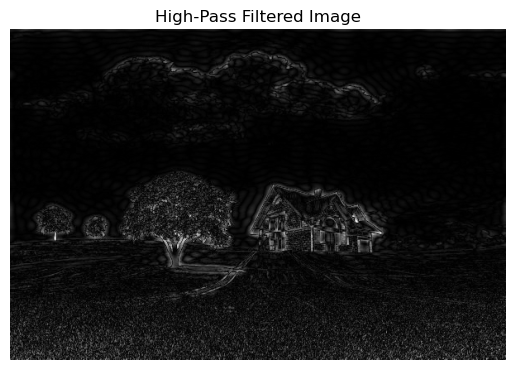

Comment: High-pass filter enhances edges and fine details by removing low-frequency background.


In [47]:
# Create circular high-pass mask
mask = np.ones((rows, cols), np.uint8)
mask[mask_area] = 0

# Apply mask & inverse transform
F_highpass = F * mask
f_highpass = np.abs(np.fft.ifft2(np.fft.ifftshift(F_highpass)))

plt.imshow(f_highpass, cmap='gray')
plt.title("High-Pass Filtered Image")
plt.axis('off')
plt.show()
print("Comment: High-pass filter enhances edges and fine details by removing low-frequency background.")
